 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [41]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.tseries.frequencies import to_offset
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

In [3]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days_in_month = (31, 28.25, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31)

In [4]:
def read_river(river_name, ps):
    river_flow = pd.read_csv(f'{river_name}_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
    river_flow['date'] = pd.to_datetime(river_flow.drop(columns='flow'))
    river_flow.set_index('date', inplace=True)
    river_flow = river_flow.drop(columns=['year', 'month', 'day'])
    if ps == 'primary':
        river_flow = river_flow.rename(columns={'flow': 'Primary River Flow'})
    elif ps == 'secondary':
        river_flow = river_flow.rename(columns={'flow': 'Secondary River Flow'})
    return river_flow

In [5]:
def read_watershed(water_shed, year):
    morrison = pd.read_excel('Copy of Flow_Mon_X_Year.xlsx', sheet_name=str(year),
                                names=['Water Year', 'Unnamed', 'area', 'total', 'Jan',
                                                   'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
                                                   'Oct', 'Nov', 'Dec'])
    waters = morrison[morrison['Water Year'] == water_shed]
    zmonths = []
    zflows = []
    for im, month in enumerate(months):
        zmonths.append(dt.datetime(year, im+1, 15))
        zflows.append(waters[month].values[0] * 1e9/86400./days_in_month[im])
    watershedflow = {'date': zmonths, 'Watershed Flow': zflows}
    df = pd.DataFrame(watershedflow)
    df.set_index('date', inplace=True)
    return df

In [7]:
Chilliwack = read_river('Chilliwack_Vedder', 'secondary')
usesecondary = True

In [9]:
Alouette = read_river('Alouette_Haney', 'secondary')

In [10]:
Nicomekl = read_river('Nicomekl_203', 'secondary')

In [12]:
Hope = read_river('Fraser_Hope', 'primary')

(12784.0, 14245.0)

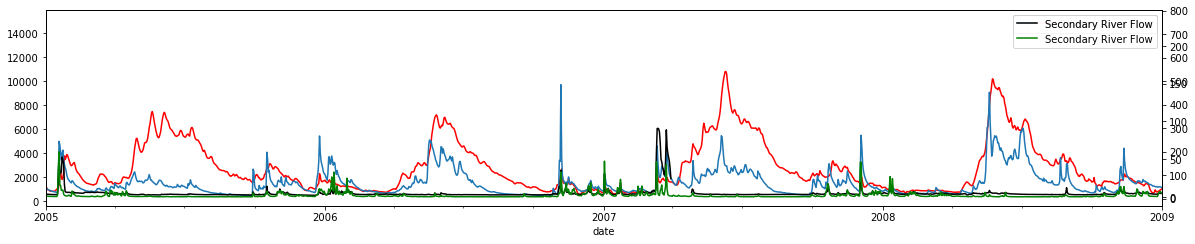

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
ax2 = ax.twinx()
ax3 = ax.twinx()
Chilliwack.plot(ax=ax2)
Alouette.plot(ax=ax3, color='k')
Nicomekl.plot(ax=ax3, color='g')
Hope.plot(ax=ax, color='r');
ax.set_xlim(datetime.datetime(2005, 1, 1), datetime.datetime(2009, 1, 1))

In [34]:
watershed = 'Fraser'
watershed_flux = np.zeros(12*5)
watershed_datetime = []
for i, year in enumerate(range(2005, 2010)):
    for j, month in enumerate(months):
        morrison = pd.read_excel('Copy of Flow_Mon_X_Year.xlsx', sheet_name=str(year),
                                names=['Water Year', 'Unnamed', 'area', 'total', 'Jan',
                                                   'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
                                                   'Oct', 'Nov', 'Dec'])
        watershed_flux[i*12 +j] = morrison[month][morrison['Water Year'] == watershed] * 1e9/86400 / days_in_month[j]
        watershed_datetime.append(datetime.datetime(year, j+1, 15))

In [35]:
morrison_fraser = pd.DataFrame(watershed_flux, watershed_datetime, ['Flux'])

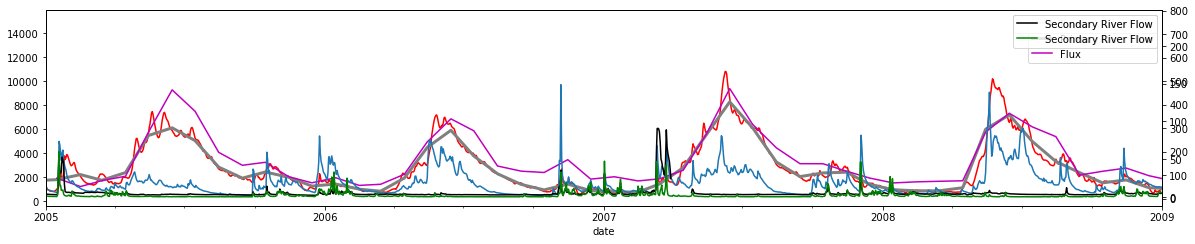

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
ax2 = ax.twinx()
ax3 = ax.twinx()
Chilliwack.plot(ax=ax2)
Alouette.plot(ax=ax3, color='k')
Nicomekl.plot(ax=ax3, color='g')
Hope.plot(ax=ax, color='r');
hope_monthly = Hope.resample('M', label='left').mean()
hope_monthly.index = hope_monthly.index + to_offset('15d')
hope_monthly.plot(ax=ax, color='gray', linewidth=3);
morrison_fraser.plot(ax=ax, color='m')
ax.set_xlim(datetime.datetime(2005, 1, 1), datetime.datetime(2009, 1, 1));

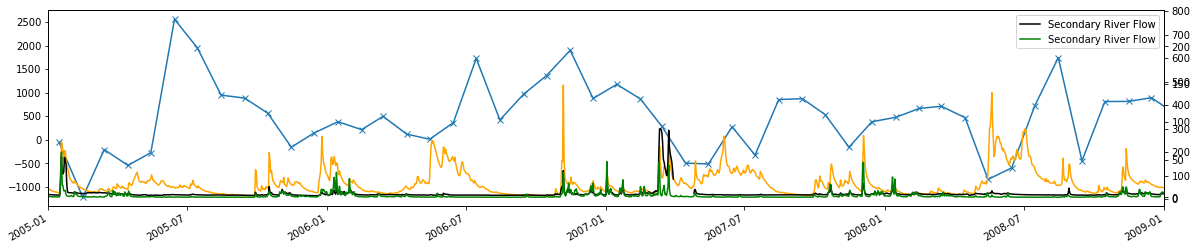

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
(morrison_fraser['Flux'] - 1.1*hope_monthly['Primary River Flow']).plot(ax=ax, marker='x')
ax2 = ax.twinx()
ax3 = ax.twinx()
Chilliwack.plot(ax=ax2, color='orange')
Alouette.plot(ax=ax3, color='k')
Nicomekl.plot(ax=ax3, color='g')
ax.set_xlim(datetime.datetime(2005, 1, 1), datetime.datetime(2009, 1, 1));

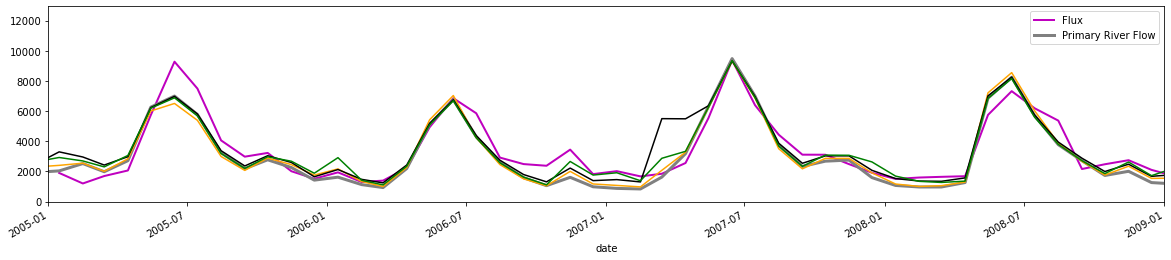

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
morrison_fraser.plot(ax=ax, color='m', linewidth=2)
(1.1458*hope_monthly).plot(ax=ax, color='gray', linewidth=3);
hpc_monthly = (1.0031*Hope['Primary River Flow']+7*Chilliwack['Secondary River Flow']).resample('M', label='left').mean()
hpc_monthly.index = hpc_monthly.index + to_offset('15d')
hpc_monthly.plot(ax=ax, color='orange');
hpa_monthly = (1.0880*Hope['Primary River Flow']+98*Alouette['Secondary River Flow']).resample('M', label='left').mean()
hpa_monthly.index = hpa_monthly.index + to_offset('15d')
hpa_monthly.plot(ax=ax, color='k');
hpn_monthly = (1.1174*Hope['Primary River Flow']+156*Nicomekl['Secondary River Flow']).resample('M', label='left').mean()
hpn_monthly.index = hpn_monthly.index + to_offset('15d')
hpn_monthly.plot(ax=ax, color='g');
ax.set_xlim(datetime.datetime(2005, 1, 1), datetime.datetime(2009, 1, 1));

45624514.50350073
48098965.53450306
58525714.71989442
41750978.194551095


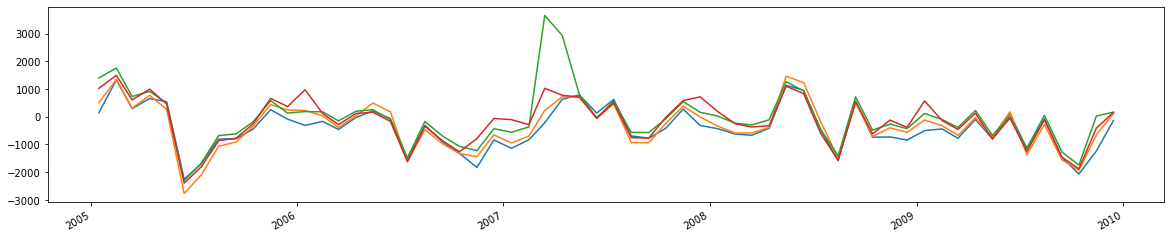

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
(1.1495*hope_monthly['Primary River Flow'] - morrison_fraser['Flux']).plot(ax=ax)
print (((1.1495*hope_monthly['Primary River Flow'] - morrison_fraser['Flux'])**2).sum())
(hpc_monthly - morrison_fraser['Flux']).plot(ax=ax)
print (((hpc_monthly - morrison_fraser['Flux'])**2).sum())
(hpa_monthly - morrison_fraser['Flux']).plot(ax=ax)
print (((hpa_monthly - morrison_fraser['Flux'])**2).sum())
(hpn_monthly - morrison_fraser['Flux']).plot(ax=ax)
print (((hpn_monthly - morrison_fraser['Flux'])**2).sum())

44631381.45441909
46997365.19364937
62062697.391489625
40962309.7662539


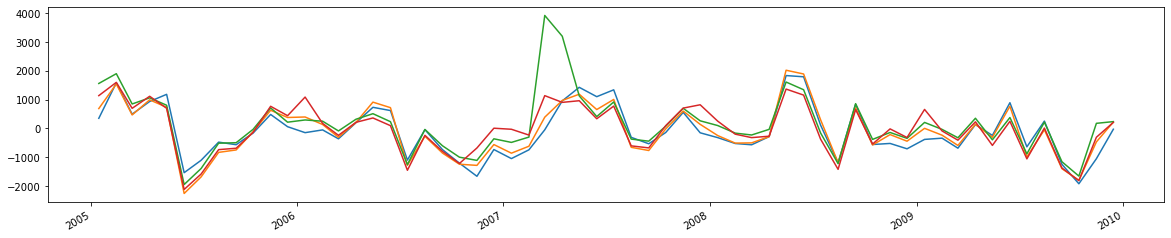

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
(1.2667*hope_monthly['Primary River Flow'] - morrison_fraser['Flux']).plot(ax=ax)
print (((1.2667*hope_monthly['Primary River Flow'] - morrison_fraser['Flux'])**2).sum())
(1.0776*hpc_monthly - morrison_fraser['Flux']).plot(ax=ax)
print (((1.0776*hpc_monthly - morrison_fraser['Flux'])**2).sum())
(1.0498*hpa_monthly - morrison_fraser['Flux']).plot(ax=ax)
print (((1.0498*hpa_monthly - morrison_fraser['Flux'])**2).sum())
(1.0394*hpn_monthly - morrison_fraser['Flux']).plot(ax=ax)
print (((1.0394*hpn_monthly - morrison_fraser['Flux'])**2).sum())